In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe



## Pair Programming Estandarización




En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:




Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.



In [5]:
df = pd.read_csv("../datos/sephora_website_dataset2.csv", index_col = 0)
df.head(2)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_raiz
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,2.00000
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,2.12132


Los elementos a estandarizar son las variables numéricas predictoras, así que las separamos en un nuevo dataframe.

In [6]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,rating_raiz
0,2218774,4.0,4,3002,66.0,75.0,1,0,0,0,2.000000
1,2044816,4.5,76,2700,66.0,66.0,1,0,0,0,2.121320
2,1417567,4.5,26,2600,180.0,180.0,1,0,0,0,2.121320
3,1417617,4.5,23,2900,120.0,120.0,1,0,0,0,2.121320
4,2218766,3.5,2,943,72.0,80.0,1,0,0,0,1.870829


Pero vemos que hay unas columnas que no son realmente numéricas, sino categóricas. Las eliminamos.

In [8]:
numericas.drop(columns = ['id', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer'], inplace = True)

Mostramos sus estadísticos usando describe()

In [10]:
numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,9168.0,3.990020,1.007707,0.0,4.0,4.0,4.50000,5.000000e+00
number_of_reviews,9168.0,282.139180,890.642028,0.0,10.0,46.0,210.00000,1.900000e+04
love,9168.0,16278.585079,42606.514471,0.0,1600.0,4800.0,13800.00000,1.300000e+06
price,9168.0,50.063237,47.164989,2.0,24.0,35.0,59.00000,5.490000e+02
value_price,9168.0,51.823590,49.459020,2.0,25.0,35.0,60.00000,5.490000e+02
rating_raiz,9168.0,1.948711,0.438826,0.0,2.0,2.0,2.12132,2.236068e+00


### Sklearn StandardScaler


Decidimos usar el método StandardScaler, ya que es muy práctico y se puede utilizar en varias columnas a la vez. Para usarlo lo importamos en la siguiente celda y lo iniciamos.

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()

Este método lo usaremos solo para las predictorias, necesitamos hacer un drop de nuestra variable respuesta, 'rating'

In [13]:
numericas.drop(['rating'], axis = 1, inplace = True)


Con el método fit ajustamos nuestras variables.

In [14]:
scaler.fit(numericas)

StandardScaler()

Los transformamos.

In [16]:
# transformamos los datos


X_escaladas = scaler.transform(numericas)

El array resultante de la transformación debe convertirse a dataframe.

In [17]:

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,number_of_reviews,love,price,value_price,rating_raiz
0,-0.312308,-0.311626,0.337912,0.468624,0.116885
1,-0.231463,-0.318715,0.337912,0.286645,0.393366


Sacamos la media y la desviación estándar de cada columna con el siguiente bucle for.

In [19]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna number_of_reviews es:  -4.7524762872397764e-17
La desviación estándar de la columna number_of_reviews es: 1.0000545419837368
-------------------------------------------------------------
La media de la columna love es:  3.102278953408296e-16
La desviación estándar de la columna love es: 1.0000545419837383
-------------------------------------------------------------
La media de la columna price es:  -2.689446743467378e-16
La desviación estándar de la columna price es: 1.0000545419837361
-------------------------------------------------------------
La media de la columna value_price es:  4.513732319847925e-16
La desviación estándar de la columna value_price es: 1.000054541983733
-------------------------------------------------------------
La media de la columna rating_raiz es:  2.454503538560468e-15
La desviación estándar de la columna rating_raiz es: 1.0000545419837377
-------------------------------------------------------------


> La estandarización ha convertido los valores de todas las columnas a la misma unidad, y a partir de aquí podremos compararlas. 

Lo mostraremos también de manera visual.

In [21]:
numericas_estandar.head(2)

,number_of_reviews,love,price,value_price,rating_raiz
0,-0.312308,-0.311626,0.337912,0.468624,0.116885
1,-0.231463,-0.318715,0.337912,0.286645,0.393366


In [22]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_reviews,9168.0,-4.752476e-17,1.000055,-0.316799,-0.305571,-0.265148,-0.081001,21.017290
love,9168.0,3.102279e-16,1.000055,-0.382089,-0.344534,-0.269424,-0.058177,30.131341
price,9168.0,-2.689447e-16,1.000055,-1.019100,-0.552627,-0.319391,0.189489,10.579118
value_price,9168.0,4.513732e-16,1.000055,-1.007426,-0.542369,-0.340171,0.165326,10.052838
rating_raiz,9168.0,2.454504e-15,1.000055,-4.440982,0.116885,0.116885,0.393366,0.654869


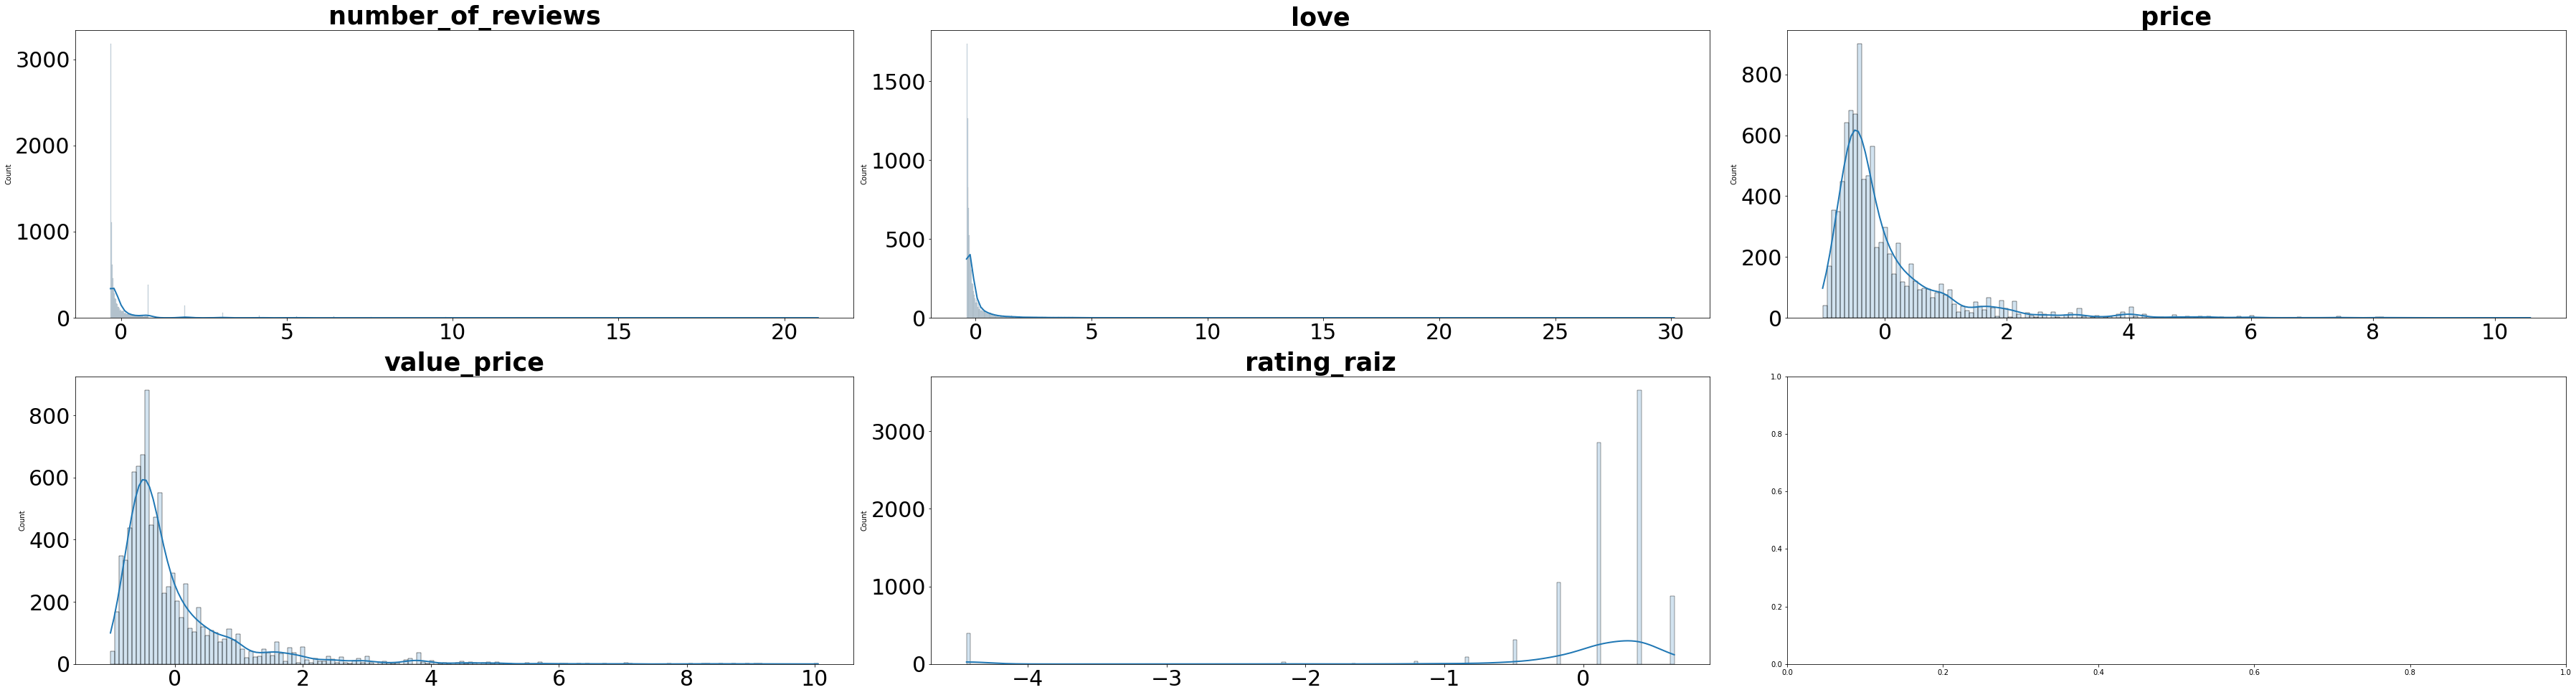

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (50, 20))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 30)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])


### Sklearn RobustScaler


In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
# construir el modelo de escalador
robust = RobustScaler()

In [31]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [32]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [33]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,number_of_reviews,love,price,value_price,rating_raiz
0,-0.21,-0.147377,0.885714,1.142857,0.0
1,0.15,-0.172131,0.885714,0.885714,1.0


In [34]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna number_of_reviews es:  1.18069589877839
La desviación estándar de la columna number_of_reviews es: 4.453210142439349
-------------------------------------------------------------
La media de la columna love es:  0.9408676293880402
La desviación estándar de la columna love es: 3.4923372517101483
-------------------------------------------------------------
La media de la columna price es:  0.43037820992271564
La desviación estándar de la columna price es: 1.34757111650916
-------------------------------------------------------------
La media de la columna value_price es:  0.48067399027674124
La desviación estándar de la columna value_price es: 1.413114864490888
-------------------------------------------------------------
La media de la columna rating_raiz es:  -0.42276081215723876
La desviación estándar de la columna rating_raiz es: 3.6170823750719294
-------------------------------------------------------------


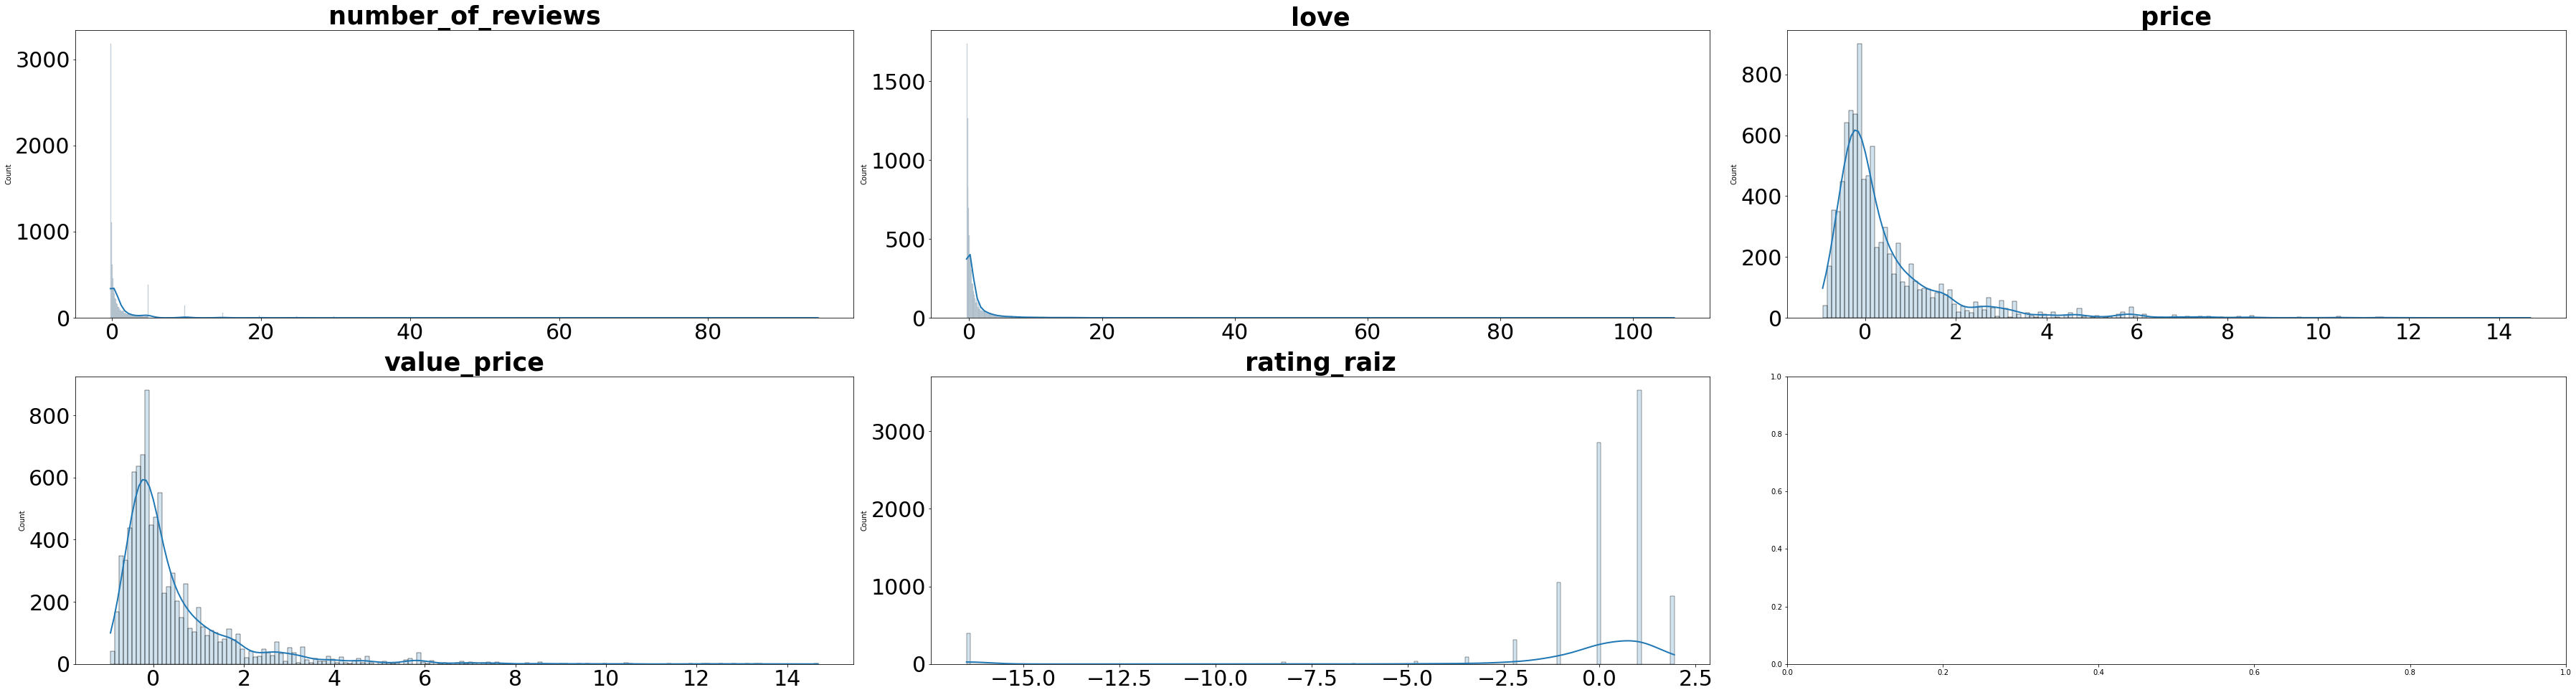

In [35]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (50, 20))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 30)
    axes[i].set_xlabel("")

fig.tight_layout()

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])

Añadimos los datos estandarizados a nuestro dataframe.

In [37]:
df[numericas_estandar.columns] = numericas_estandar
df.head(1)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,url,marketingflags,marketingflags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,rating_raiz
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,-0.312308,-0.311626,0.337912,0.468624,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,0.116885



Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [38]:
df.to_csv("../datos/sephora_website_dataset2.csv")